# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a s3 bucket: s3://sta9760s2021-daniel-spark-datasets/*.json

## Part I: Installation and Initial Setup

In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1619552506971_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

# Installation and Initial Setup

Let's begin by installing the necessary libraries that we may need to conduct your analysis.

In [3]:
sc.install_pypi_package("pandas==1.2.4")
sc.install_pypi_package("matplotlib==3.4.1")
sc.install_pypi_package("seaborn==0.11.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/51/51/48f3fc47c4e2144da2806dfb6629c4dd1fa3d5a143f9652b141e979a8ca9/pandas-1.2.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/34/542152297dcc6c47a9dcb0685eac6d652d878ed3cea83bf2b23cb988e857/Pillow-8.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using ca

# Importing Packages

Now, import the installed packages from the previous block below.

In [4]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Business Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [5]:
business_df = spark.read.json('s3://sta9760s2021-daniel-spark-datasets/yelp_academic_dataset_business.json')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

Display the number of rows and columns in our dataset.

In [6]:
# Total columns and rows
print(f'Total Columns: {len(business_df.dtypes)}')
print(f'Total Rows: {business_df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

In [7]:
print('Display the DataFrame schema below\n')

business_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the DataFrame schema below

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable =

In [8]:
#Display the first 5 rows of the following columns: business_id, name, city, state, categories
business_df.select(business_df['business_id'], business_df['name'], business_df['city'], business_df['state'], business_df['stars'], business_df['categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: <b> how many unique categories are represented in this dataset?</b>

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.



In [9]:
from pyspark.sql.functions import split, explode, explode_outer, countDistinct, desc

business_df.createOrReplaceTempView("Yelp")

sqldf = spark.sql(
'''
SELECT business_id, SPLIT(categories,',') AS categories FROM Yelp
'''
)

sqldf.toPandas().head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              business_id                                         categories
0  6iYb2HFDywm3zjuRg0shjw  [Gastropubs,  Food,  Beer Gardens,  Restaurant...
1  tCbdrRPZA0oiIYSmHG3J0w  [Salad,  Soup,  Sandwiches,  Delis,  Restauran...
2  bvN78flM8NLprQ1a1y5dRg  [Antiques,  Fashion,  Used,  Vintage & Consign...
3  oaepsyvc0J17qwi8cfrOWg                      [Beauty & Spas,  Hair Salons]
4  PE9uqAjdw0E4-8mjGl3wVA  [Gyms,  Active Life,  Interval Training Gyms, ...
5  D4JtQNTI4X3KcbzacDJsMw                               [Restaurants,  Thai]
6  t35jsh9YnMtttm69UCp7gw      [Dentists,  Health & Medical,  Orthodontists]
7  jFYIsSb7r1QeESVUnXPHBw                 [Breakfast & Brunch,  Restaurants]
8  N3_Gs3DnX4k9SgpwJxdEfw  [Shopping,  Jewelry Repair,  Appraisal Service...
9  tXvdYGvlEceDljN8gt2_3Q                          [Barbers,  Beauty & Spas]

In [10]:
from pyspark.sql.functions import split, explode

business_df_categories = business_df.withColumn("categories", explode(split('categories', ",")))

business_df_categories.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|         business_id|   categories|
+--------------------+-------------+
|6iYb2HFDywm3zjuRg...|   Gastropubs|
|6iYb2HFDywm3zjuRg...|         Food|
|6iYb2HFDywm3zjuRg...| Beer Gardens|
|6iYb2HFDywm3zjuRg...|  Restaurants|
|6iYb2HFDywm3zjuRg...|         Bars|
+--------------------+-------------+
only showing top 5 rows

# Total Unique Categories

Finally, we are ready to answer the question: <b> what is the total number of unique categories available?</b>

Below, implement the code necessary to calculate this figure.

In [11]:
unique_categories = business_df_categories.select('business_id','categories')
unique_categories.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2487

# Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

## Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.



In [12]:
top_categories = business_df_categories.groupBy("categories").count().sort(desc('count')).limit(20)
top_categories.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|36340|
|                Food|22094|
|            Shopping|20056|
|         Restaurants|14423|
|       Home Services|12001|
|       Beauty & Spas|11633|
|    Health & Medical|11390|
|           Nightlife| 9808|
|      Local Services| 9299|
|                Bars| 8914|
| Event Planning &...| 7617|
|                Food| 7375|
|         Active Life| 7039|
|          Automotive| 6785|
|            Shopping| 6149|
|        Coffee & Tea| 5735|
|          Sandwiches| 5697|
| American (Tradit...| 5235|
|             Fashion| 5231|
|       Beauty & Spas| 4941|
+--------------------+-----+

# Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories.

In [13]:
top_categories.toPandas().plot.barh('categories','count',title = 'Top 20 Categories')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<AxesSubplot:title={'center':'Top 20 Categories'}, ylabel='categories'>

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

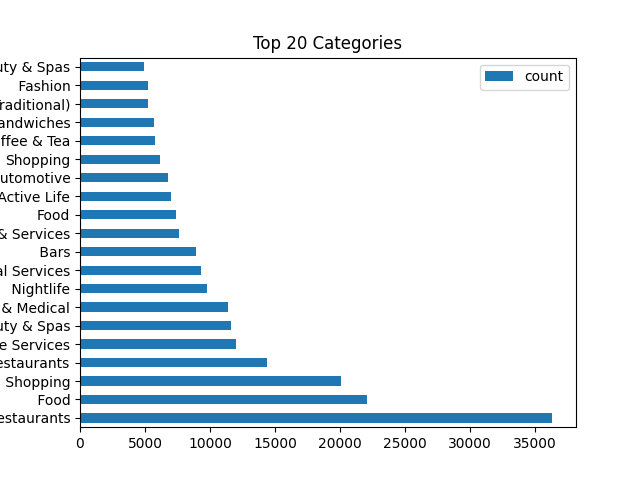

In [14]:
%matplot plt

# Part III: Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [15]:
review_df = spark.read.json('s3://sta9760s2021-daniel-spark-datasets/yelp_academic_dataset_review.json')
review_df.printSchema()

# Total columns and rows
print(f'Total Columns: {len(review_df.dtypes)}')
print(f'Total Rows: {review_df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Total Columns: 9
Total Rows: 8,635,403

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [16]:
review_df.select(review_df['business_id'], review_df['stars']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who <b> took the time to submit a written review.</b>

In [17]:
from pyspark.sql.functions import avg

business_avg_stars = review_df.groupBy('business_id').avg('stars')
business_avg_stars.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|O_BAT_rvszHYBNEM6...|             2.45|
|E8Fl7qE_y-bhRbkkd...|4.666666666666667|
|MPzc6QuEjwk3E3jVT...|           3.3125|
+--------------------+-----------------+
only showing top 10 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:

(row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [18]:
df1 = business_avg_stars.select('business_id','avg(stars)')
df2 = business_df.select('business_id','stars','name','city','state')
review_and_business = df1.join(df2, df1.business_id == df2.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
review_and_business = review_and_business.select('avg(stars)','stars','name','city','state')
review_and_business.show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+------------+-----+
|        avg(stars)|stars|                name|        city|state|
+------------------+-----+--------------------+------------+-----+
|               5.0|  5.0|    CheraBella Salon|     Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|    Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|      Austin|   TX|
|               5.0|  5.0|          WonderWell|      Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|  Wilmington|   MA|
|               1.8|  2.0|Allstate Insuranc...|      Austin|   TX|
|               4.2|  4.0|Divine Frozen Yogurt|Happy Valley|   OR|
|2.5454545454545454|  2.5|Glendale Square M...|     Everett|   MA|
| 3.774193548387097|  4.0| ONE Boulder Fitness|     Boulder|   CO|
|               5.0|  5.0|    Mel's Frame Shop|    Portland|   OR|
+------------------+-----+--------------------+------------+-----+
only showing top 10 rows

And finally, graph it!

In [20]:
row = review_and_business.select('avg(stars)','stars').toPandas()

row['Skew'] = (row['avg(stars)'] - row['stars']) / row['stars']
row

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        avg(stars)  stars      Skew
0         3.000000    3.0  0.000000
1         4.538462    4.5  0.008547
2         4.200000    4.0  0.050000
3         3.800000    4.0 -0.050000
4         3.606061    3.5  0.030303
...            ...    ...       ...
160580    4.400000    4.5 -0.022222
160581    3.755102    3.5  0.072886
160582    4.800000    5.0 -0.040000
160583    3.782609    4.0 -0.054348
160584    2.692308    3.0 -0.102564

[160585 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

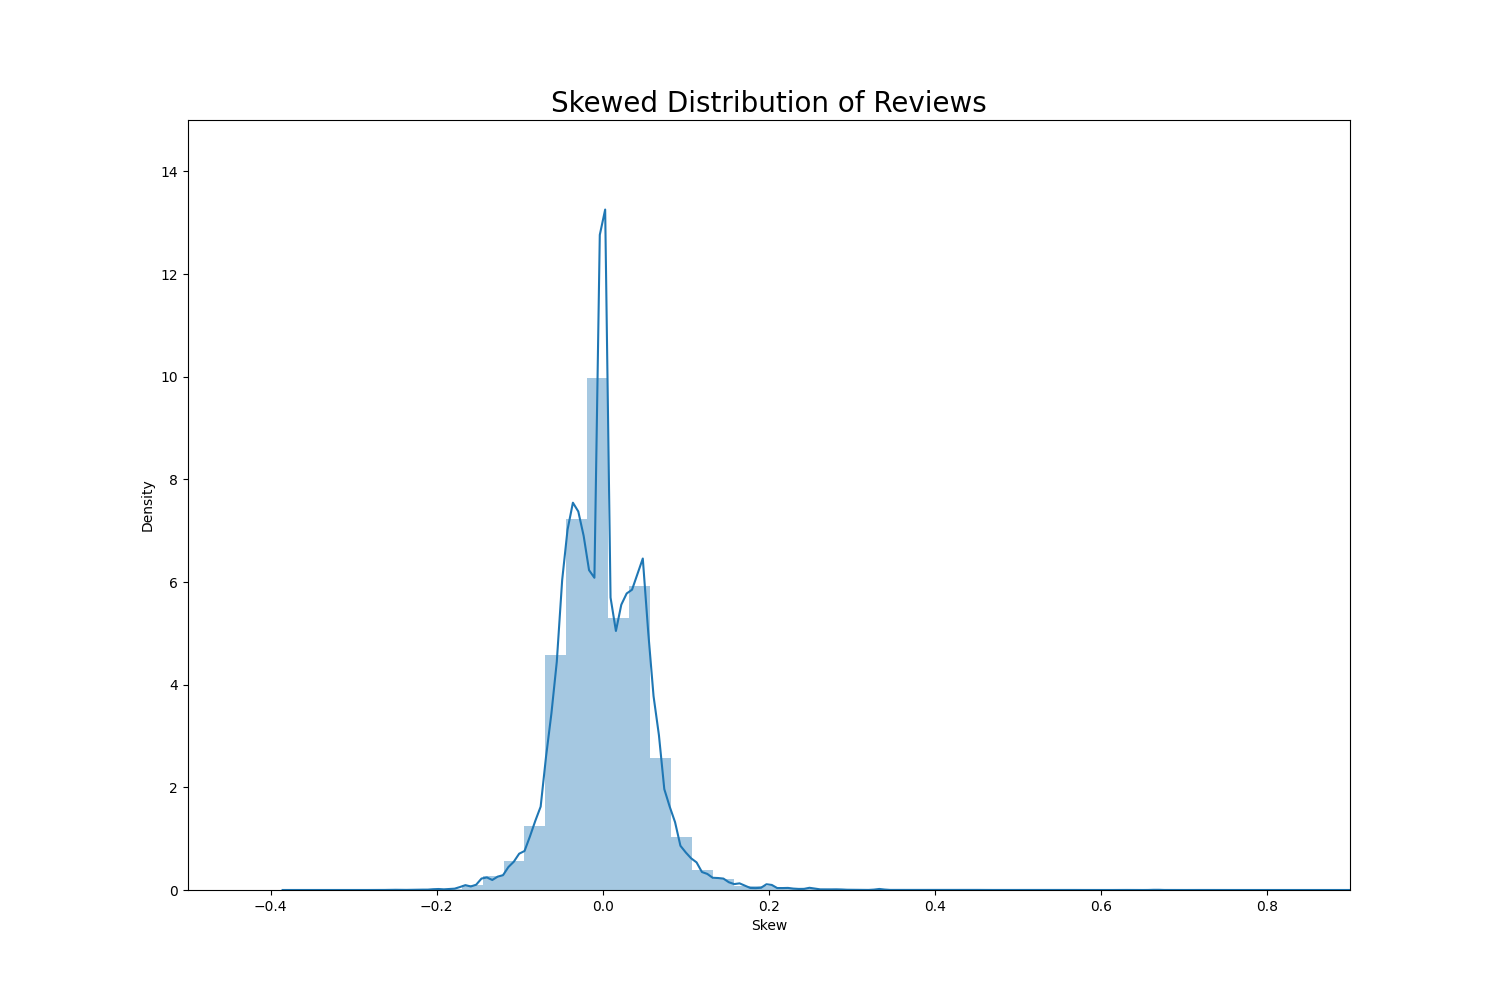

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(row['Skew'], kde=True)
plt.title('Skewed Distribution of Reviews', size = 20)
plt.axis((-0.5,0.9,0,15))

%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? 

### Expound on implications / interpretations of this graph

The graph above doesn't clearly show if the skewness is positive or negative. To better interpetrate the skewness of the graph, I'll use the alternative Pearson Mode Skewness. The formula is:

Skew = 3 * (Mean - Median) / Standard Deviation

In [22]:
mean = row['Skew'].mean()
median = row['Skew'].median()
std_deviation = row['Skew'].std()
skewness = (3*(mean-median)/ std_deviation)

print(f'Mean: {mean.round(5)}')
print(f'Median : {median.round(5)}')
print(f'Std : {std_deviation.round(5)}')
print(f'Skewness : {skewness.round(5)}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean: 0.00114
Median : 0.0
Std : 0.05142
Skewness : 0.06676

The skewness is 0.06676, which is less than 0. As a result, it implies that the skewness is positive, showing that users who wrote reviews were overall slightly more satistied than its peers. 



# Part IV: Should the Elite be Trusted?


## Loading User Data

In [23]:
user_df = spark.read.json('s3://sta9760s2021-daniel-spark-datasets/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview Of Data

In [24]:
# Total columns and rows
print(f'Total Columns: {len(user_df.dtypes)}')
print(f'Total Rows: {user_df.count():,}')

user_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 2,189,457
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

## Checking Important Columns

In [25]:
user_df.select('user_id','elite','review_count','average_stars').show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+-------------+
|             user_id|               elite|review_count|average_stars|
+--------------------+--------------------+------------+-------------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|        1220|         3.85|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|        2136|         4.09|
|D6ErcUnFALnCQN4b1...|           2010,2011|         119|         3.76|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...|         987|         3.77|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011|         495|         3.72|
|n-QwITZYrXlKQRiV3...|2010,2011,2012,20...|         229|         3.59|
|eCJoZqpV1fDKJGAsX...|                    |          51|         3.86|
|cojecOwQJpsYDxnjt...|           2010,2011|          51|         3.79|
|1jXmzuIFKxTnEnR0p...|2010,2011,2012,20...|         299|         3.43|
|-8QoOIfvwwxJ4sY20...|2012,2013,2014,20...|         288|         3.88|
|EtofuImujQBSo02xa...|           2009,2010|          44|         3.83|
|cxS6d

In [26]:
#Only keeping elite users

elite_only = user_df.filter(user_df['elite'] != '').select('user_id','elite','review_count','average_stars')

#Selecting important columns from review dataframe

review_df2 = review_df.select('business_id','stars','user_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
#Joining users and review dataframes
review_elite = elite_only.join(review_df2, elite_only.user_id == review_df2.user_id).drop(review_df['user_id'])
review_elite.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+-------------+--------------------+-----+
|             user_id|               elite|review_count|average_stars|         business_id|stars|
+--------------------+--------------------+------------+-------------+--------------------+-----+
|0JQYSCWOQWKqK7KMj...| 2015,2016,2017,2018|         232|         3.83|eCLuYcTuQpDPFOezh...|  4.0|
|l91pXxTZGS5CNWjNB...|2012,2013,2014,20...|         424|         3.53|RP_U_TyolABy3eYuR...|  3.0|
|WAyYDJKFMzlTTnKxq...|2011,2012,2013,20...|         236|         3.65|_6TF9YiOiYSToPBRz...|  5.0|
|g34Qcj06LmCDhKzks...|2017,2018,2019,20,20|         289|         3.99|bxy3khT-2R66tcdKj...|  4.0|
|_UMIAnpnXWAqXS4y6...|2015,2016,2017,20...|         195|         4.37|A0F6H8OO3qYAvI2L3...|  4.0|
|b9sznODmw0OL-nD5v...|           2015,2016|          90|         3.63|bPmWDBkjBhV11Yk4B...|  4.0|
|i3Edg1pY9ezhFGlSY...|          2019,20,20|         138|         4.01|b4PgITSqSWoPhyJ-M...|  5.0|
|0qQXako5doigx3X7J..

In [28]:
#Joining Review Elite and Business Avg stars

skew2 = review_elite.join(business_avg_stars, business_avg_stars.business_id == review_elite.business_id)
skew2.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+-------------+--------------------+-----+--------------------+------------------+
|             user_id|               elite|review_count|average_stars|         business_id|stars|         business_id|        avg(stars)|
+--------------------+--------------------+------------+-------------+--------------------+-----+--------------------+------------------+
|olrx_XfiOSiALGqmB...|      2016,2017,2018|         179|          3.9|--JuLhLvq3gyjNnXT...|  5.0|--JuLhLvq3gyjNnXT...|               5.0|
|jWi0LzO0jRpr6TMwo...|2016,2017,2018,20...|         298|         4.14|--JuLhLvq3gyjNnXT...|  5.0|--JuLhLvq3gyjNnXT...|               5.0|
|wEp-ZgJ6XpETVo1rs...|     2018,2019,20,20|          84|         4.34|--_nBudPOb1lNRgKf...|  5.0|--_nBudPOb1lNRgKf...|             3.875|
|VatcQtdb5tlz4D-N6...|2014,2015,2016,20...|         556|         4.11|--_nBudPOb1lNRgKf...|  4.0|--_nBudPOb1lNRgKf...|             3.875|
|8XlB-J73QOFV91Y0e...|2009,2010,20

In [29]:
#Checking skewness
row2 = skew2.toPandas()
row2['Skew'] = (row2['avg(stars)'] - row2['stars']) / row2['stars']
row2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                        user_id  ...      Skew
0        olrx_XfiOSiALGqmB_PfSg  ...  0.000000
1        jWi0LzO0jRpr6TMwo9anwQ  ...  0.000000
2        wEp-ZgJ6XpETVo1rsYsuvA  ... -0.225000
3        VatcQtdb5tlz4D-N6y8e7A  ... -0.031250
4        Wp1d0lLdpTLIGbv-LzuwjA  ...  0.288889
...                         ...  ...       ...
2169083  OdiOfb-5KQz6z54IQ8T5RA  ... -0.381579
2169084  2gas35gMf50hdkVeUxYQQg  ...  3.215909
2169085  f3xJJpUIFWmdZhhc912Leg  ...  0.053977
2169086  wX_Fgi0SkooBTnq-kGAD2Q  ... -0.156818
2169087  3XOTxkcpqttnxt52HcIN3Q  ... -0.042105

[2169088 rows x 9 columns]

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

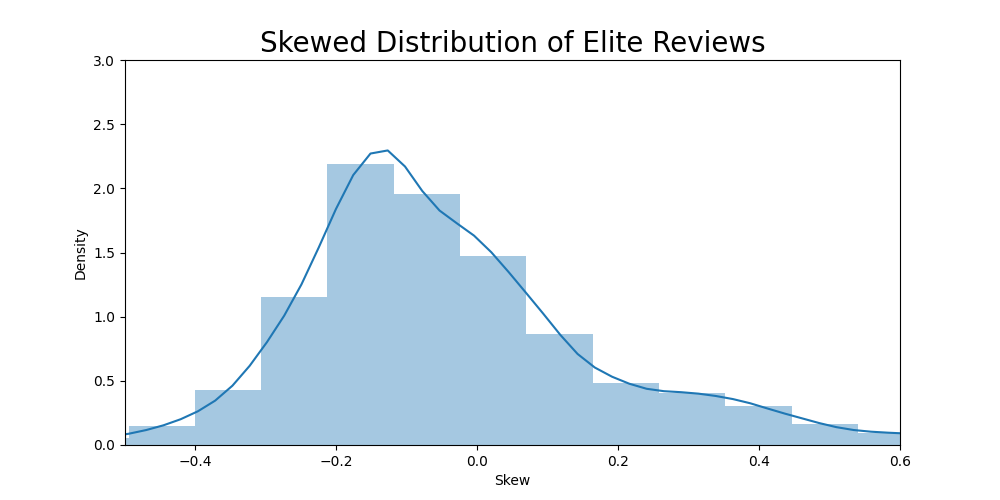

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(row2['Skew'], kde=True)
plt.title('Skewed Distribution of Elite Reviews', size = 20)
plt.axis((-0.5,0.6,0,3))

%matplot plt

In [31]:
#Similar to Part III - Using the alternative Pearson Mode Skewness formula to make sure2.

mean = row2['Skew'].mean()
median = row2['Skew'].median()
std_deviation = row2['Skew'].std()
skewness = (3*(mean-median)/ std_deviation)

print(f'Mean: {mean.round(5)}')
print(f'Median : {median.round(5)}')
print(f'Std : {std_deviation.round(5)}')
print(f'Skewness : {skewness.round(5)}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Mean: 0.08266
Median : -0.05761
Std : 0.5221
Skewness : 0.80599

How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

### Expound on implications / interpretations of this graph

With a skewness of 0.80599, we can say that it is positive, since it is more than 0. It shows tha elite users were more satisfied than their non-elite peers. Perhaps writing a positive reviews is something that they associate with their elite title. It seems as elite users should be trusted. Although both elite and non-elite reviews should be considered trustworthy. 